In [12]:
import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)


#### **Phase 1: Data Collection and Preparation**

In [13]:
# Task 1.2: Loading the dataset into pandas Dataframe
def load_data(file_path):
    """Load csv dataset into pandas Dataframe"""
    df = pd.read_csv(file_path)
    print("Shape:\n", df.shape)
    return df

url = "https://raw.githubusercontent.com/ek-chris/Practice_datasets/refs/heads/main/EasyVisa%20(1).csv"

df = load_data(url)
df.head()

Shape:
 (25480, 12)


,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [14]:
def dataset_summary(df):
    """ Summary for pandas dataset"""
    print("Dataset dtypes\n", df.dtypes)
    print("\nDataset Column\n", df.columns)
    print("\nDataset Shape\n", df.shape)
    print("\n\nDataset info\n", df.info())

dataset_summary(df)

Dataset dtypes
 case_id                   object
continent                 object
education_of_employee     object
has_job_experience        object
requires_job_training     object
no_of_employees            int64
yr_of_estab                int64
region_of_employment      object
prevailing_wage          float64
unit_of_wage              object
full_time_position        object
case_status               object
dtype: object

Dataset Column
 Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'no_of_employees', 'yr_of_estab',
       'region_of_employment', 'prevailing_wage', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

Dataset Shape
 (25480, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-n

In [15]:
# Task 1.3: Inspect the dataset for missing values and handle them appropriately.
def check_missing_values(df):
    """Prints a summary of missing values in a pandas DataFrame"""
    missing = df.isnull().sum()
    # missing = missing[missing > 0]

    print("missing values found.\n")
    print(missing)

check_missing_values(df)

missing values found.

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64


No  missing value found

In [16]:
df['no_of_employees'] = df['no_of_employees'].abs()

#### **Phase 2: Exploratory Data Analysis (EDA)**

 Feature: no_of_employees


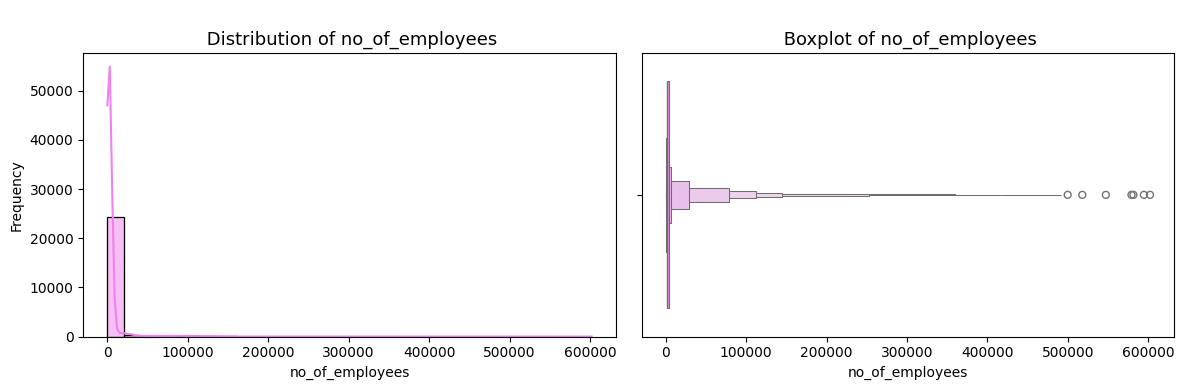

 Feature: yr_of_estab


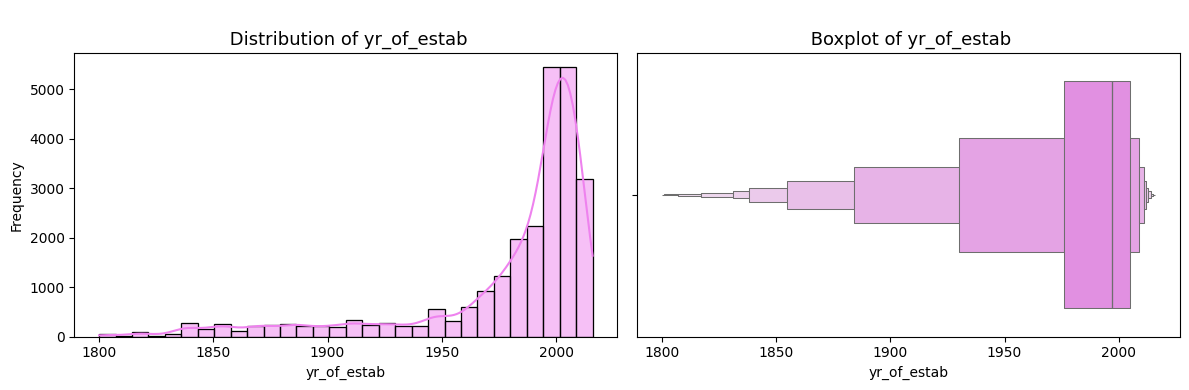

 Feature: prevailing_wage


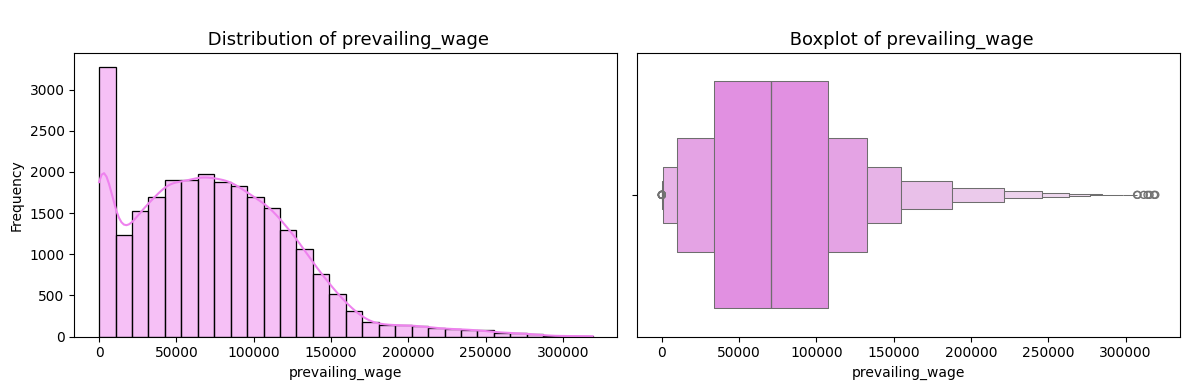

In [17]:
# Task 2.1: Conduct exploratory data analysis to understand the distribution of features and the target variable .

df_copy = df.copy()
# selecting numerica columns
num_cols = df_copy.select_dtypes(include=['int64', 'float64']).columns
df[num_cols].describe().T

def univariate_numerical_data(df, column):
    """perform univariate EDA on a single numerical column, Display"""
    print(f" Feature: {column}")
    print("="*40)
    
    plt.figure(figsize=(12, 4))

    # Histogram + KDE
    plt.subplot(1, 2, 1)
    sns.histplot(df[column], kde=True, bins=30, color='violet')
    plt.title(f'\n Distribution of {column}', fontsize=13)
    plt.xlabel(column)
    plt.ylabel('Frequency')

    # Boxplot
    plt.subplot(1,2,2)
    sns.boxenplot(x=df[column], color="violet")
    plt.title(f"\n Boxplot of {column}", fontsize= 13)

    plt.tight_layout()
    plt.show()

for num in num_cols:
    univariate_numerical_data(df_copy, num)


Value counts for continent:

continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64


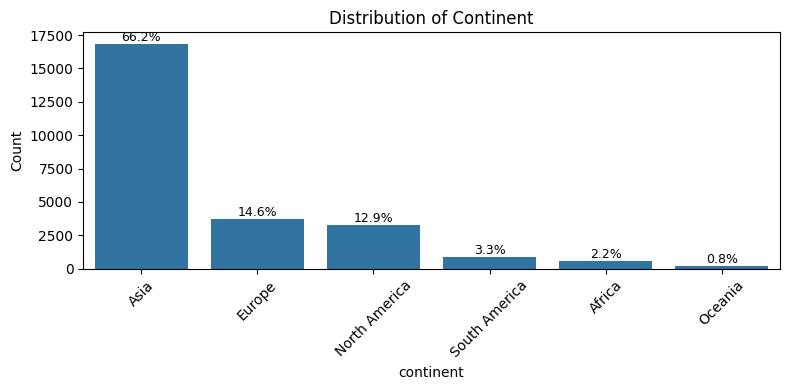


Value counts for education_of_employee:

education_of_employee
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: count, dtype: int64


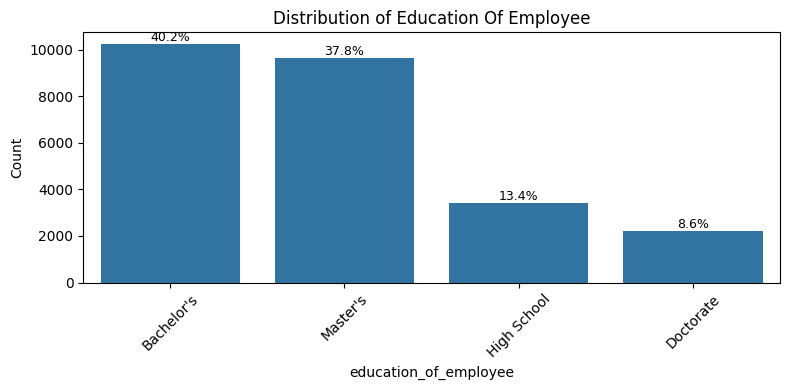


Value counts for has_job_experience:

has_job_experience
Y    14802
N    10678
Name: count, dtype: int64


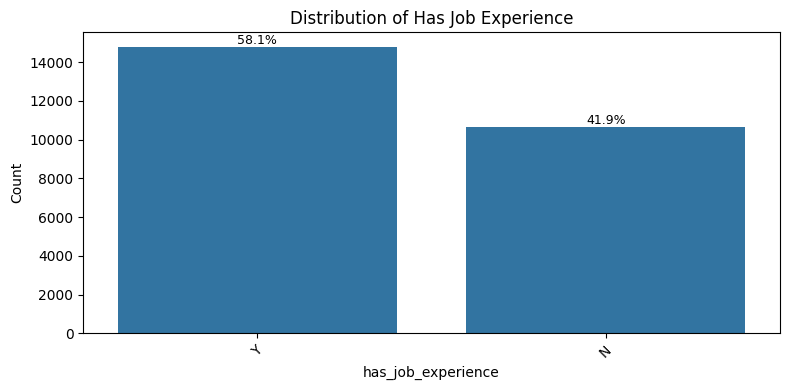


Value counts for requires_job_training:

requires_job_training
N    22525
Y     2955
Name: count, dtype: int64


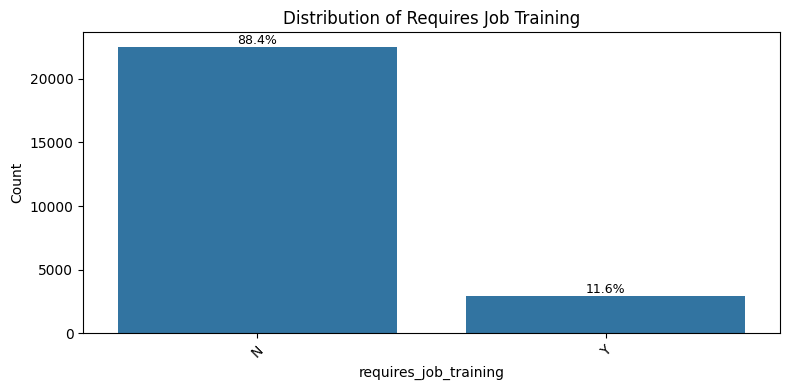


Value counts for region_of_employment:

region_of_employment
Northeast    7195
South        7017
West         6586
Midwest      4307
Island        375
Name: count, dtype: int64


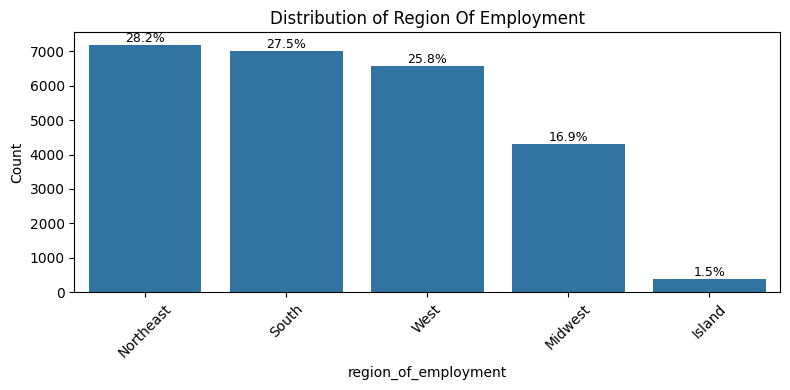


Value counts for unit_of_wage:

unit_of_wage
Year     22962
Hour      2157
Week       272
Month       89
Name: count, dtype: int64


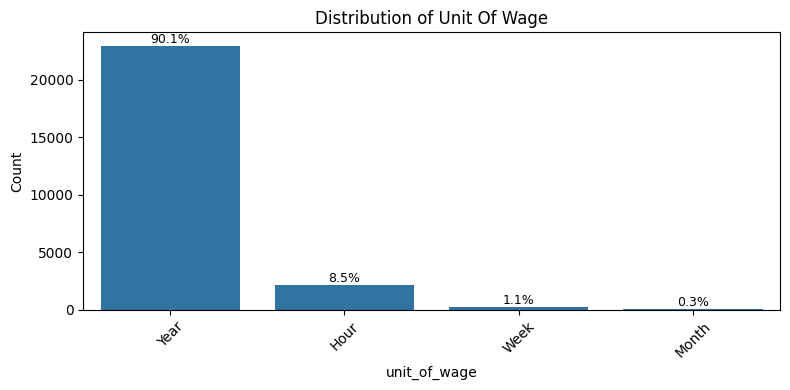


Value counts for full_time_position:

full_time_position
Y    22773
N     2707
Name: count, dtype: int64


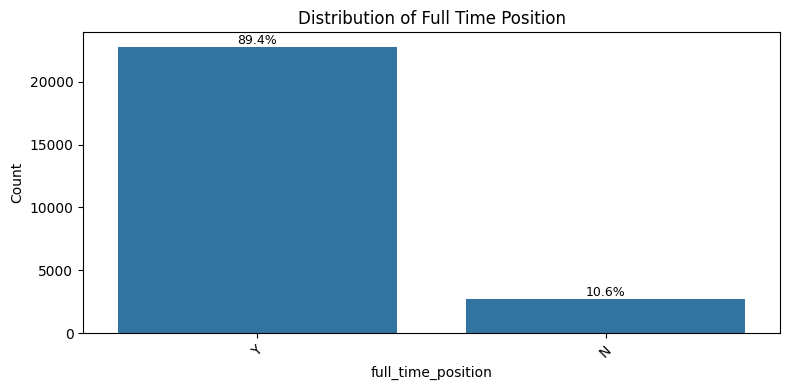

In [18]:
# selecting categorical column
cat_cols = df_copy.select_dtypes(include='object').columns.drop(['case_status', 'case_id'])

# Plotting bar plots for categorical features to understand their distribution
def plot_categorical_bars(df, column):
    # cat_cols.columns
    
    for col in column:
        print(f"\nValue counts for {col}:\n")
        print(df[col].value_counts(dropna=False))
        plt.figure(figsize=(8, 4))
        # sns.countplot(data=df, x=col, order=df[col].value_counts().index)

        ax = sns.countplot(data=df, x=col, order=df[col].value_counts().index)
        
        # Calculate total count for percentage
        total = len(df[col])
        
        # Annotate each bar with percentage
        for p in ax.patches:
            count = p.get_height()
            percentage = 100 * count / total
            ax.text(
                p.get_x() + p.get_width() / 2,   # X position
                count,                           # Y position (on top of bar)
                f'{percentage:.1f}%',            # Label format (1 decimal)
                ha='center', va='bottom', fontsize=9, color='black'
            )

        plt.title(f'Distribution of {col.replace("_", " ").title()}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

# Call the function
plot_categorical_bars(df_copy, cat_cols)

In [19]:
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


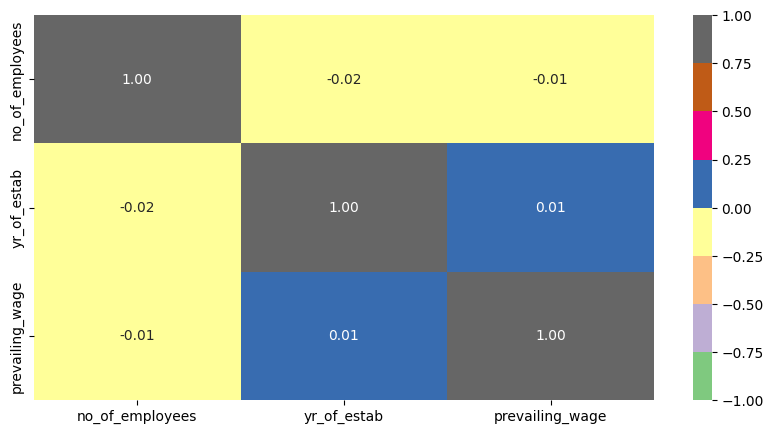

In [20]:
# Task 2.2: Visualize the relationships between features and the target variable using scatter plots, histograms, and box plots.

plt.figure(figsize=(10, 5))
sns.heatmap(
    df_copy[num_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Accent"
)
plt.show()

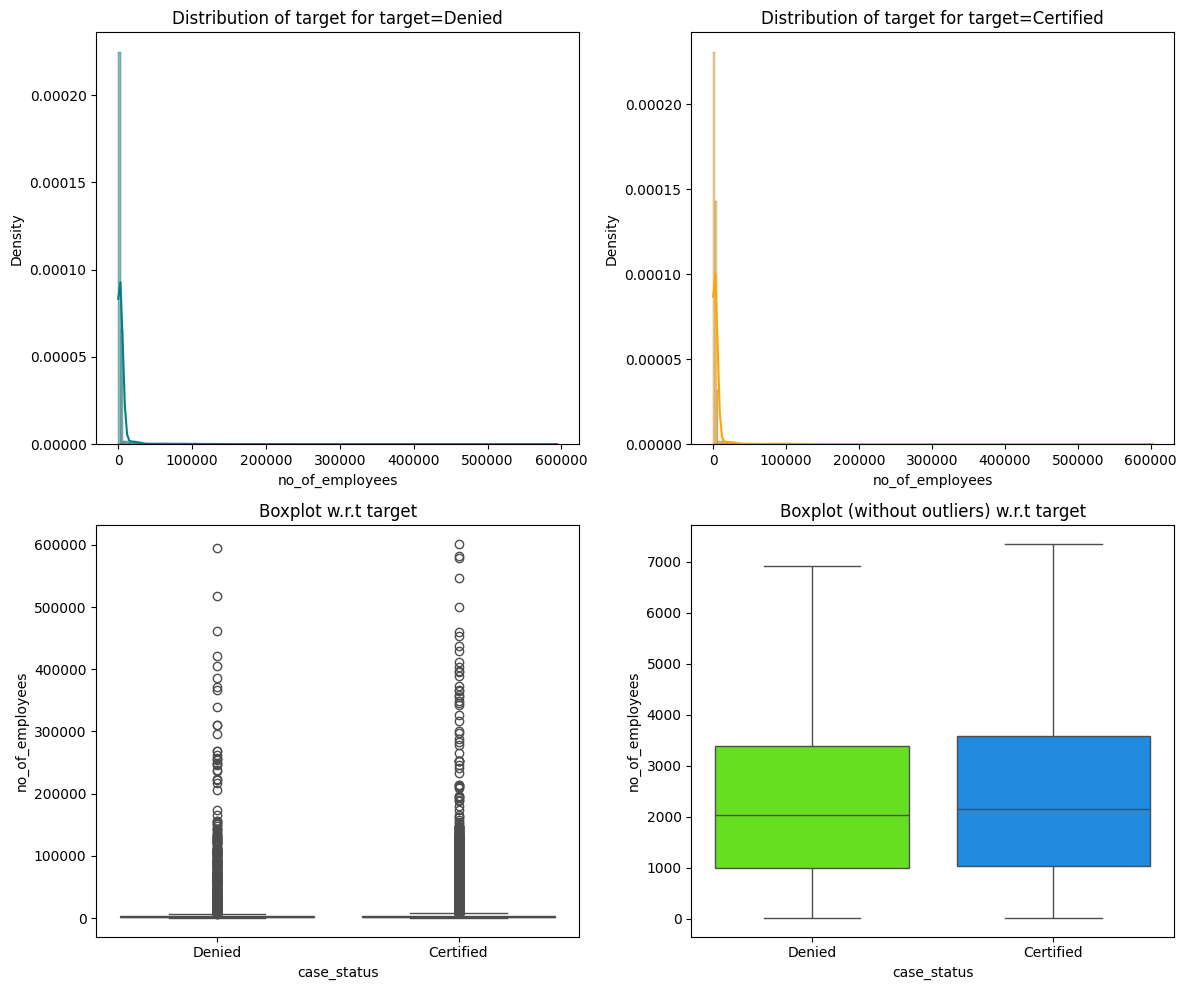

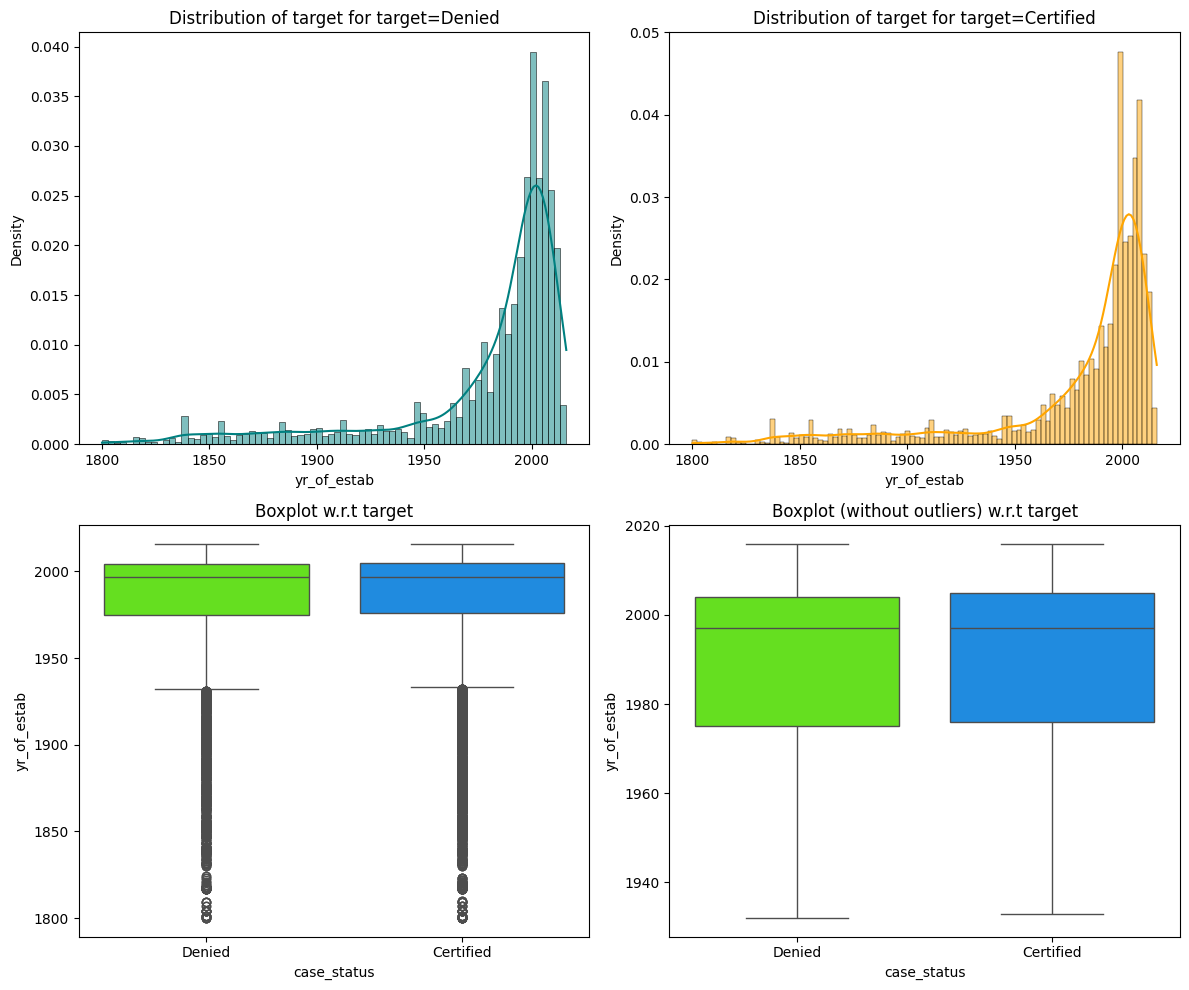

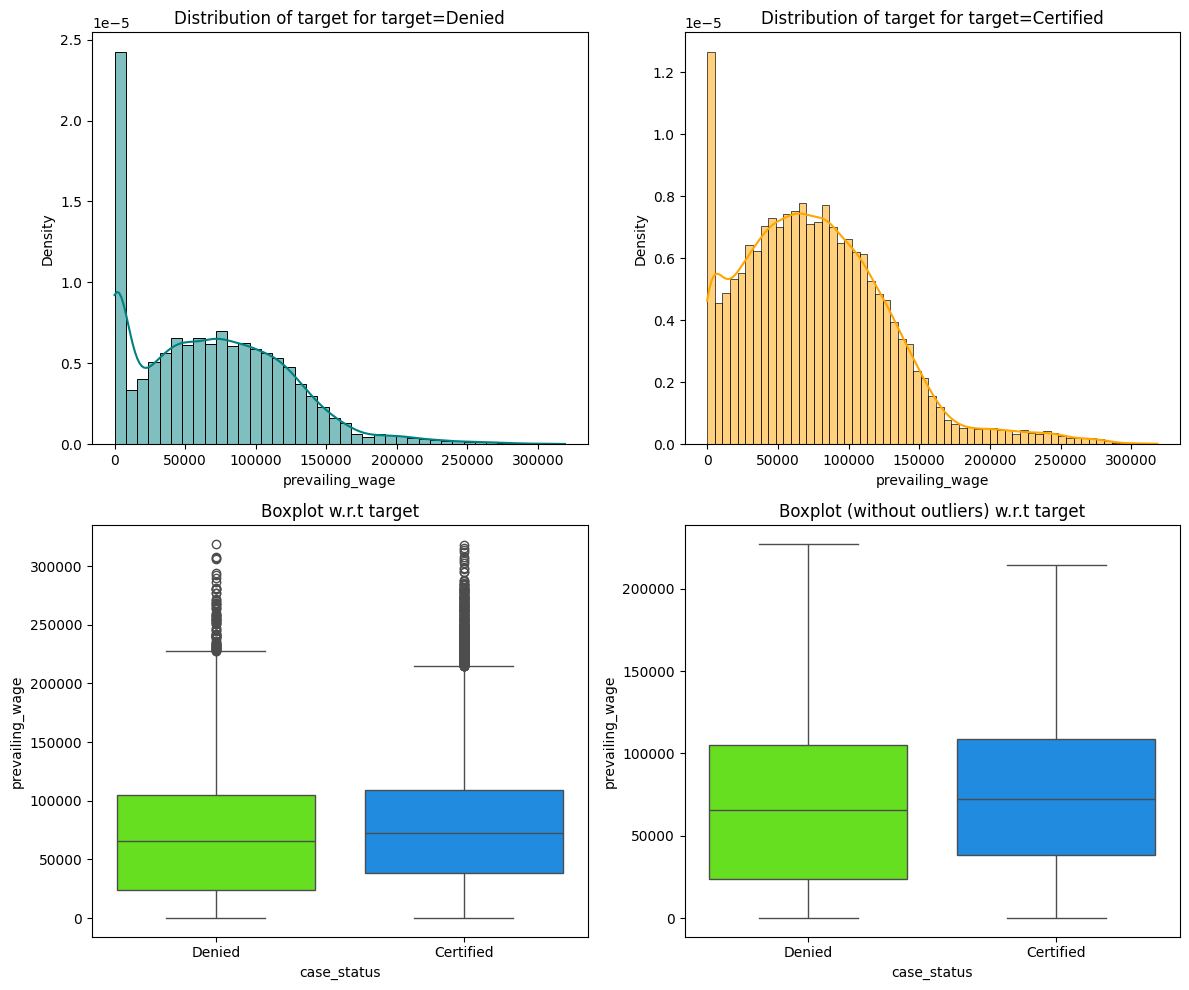

In [21]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

for num in num_cols:
    distribution_plot_wrt_target(df_copy, predictor=num, target="case_status")

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


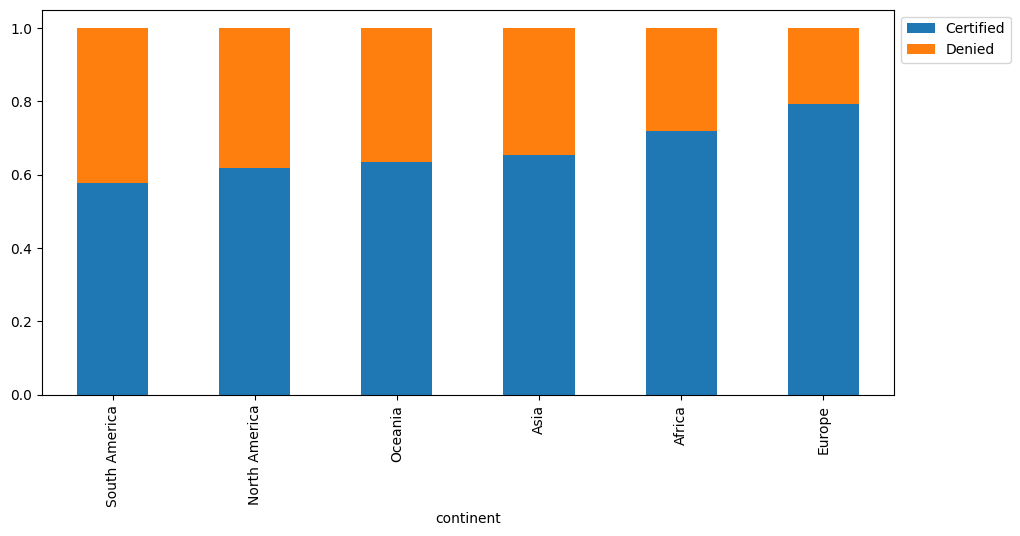

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


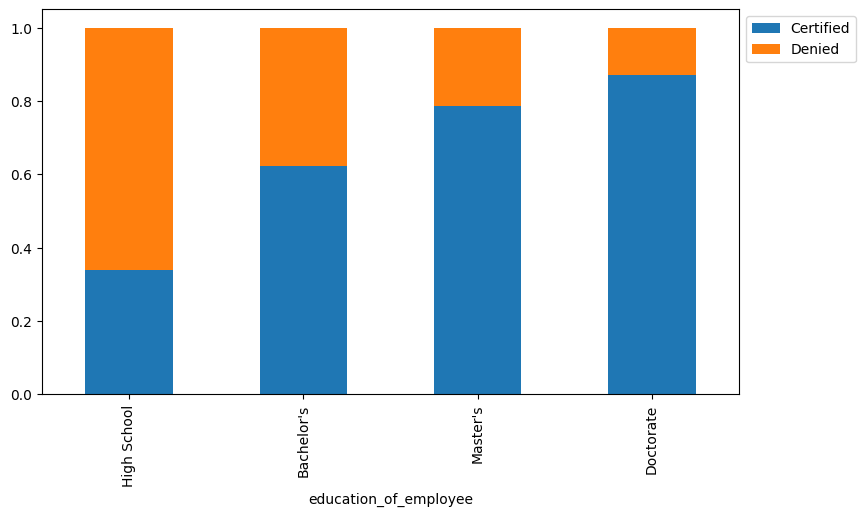

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


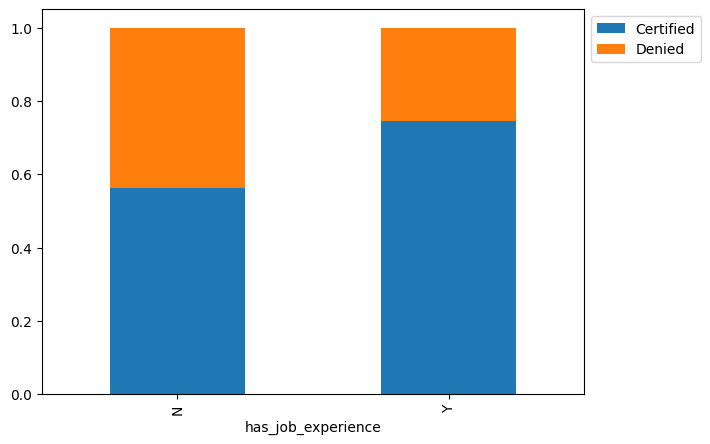

case_status            Certified  Denied    All
requires_job_training                          
All                        17018    8462  25480
N                          15012    7513  22525
Y                           2006     949   2955
------------------------------------------------------------------------------------------------------------------------


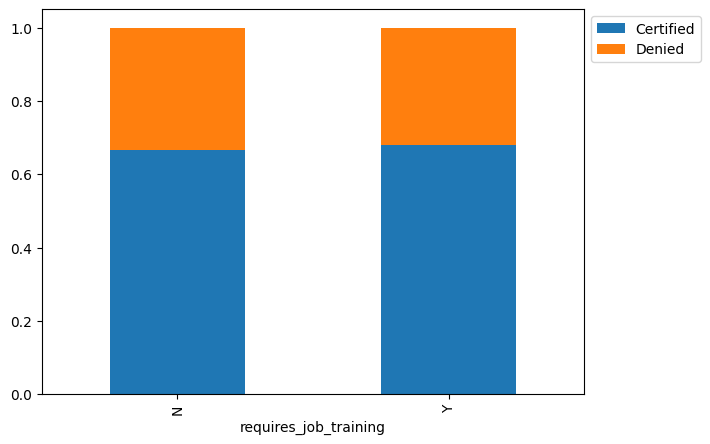

case_status           Certified  Denied    All
region_of_employment                          
All                       17018    8462  25480
Northeast                  4526    2669   7195
West                       4100    2486   6586
South                      4913    2104   7017
Midwest                    3253    1054   4307
Island                      226     149    375
------------------------------------------------------------------------------------------------------------------------


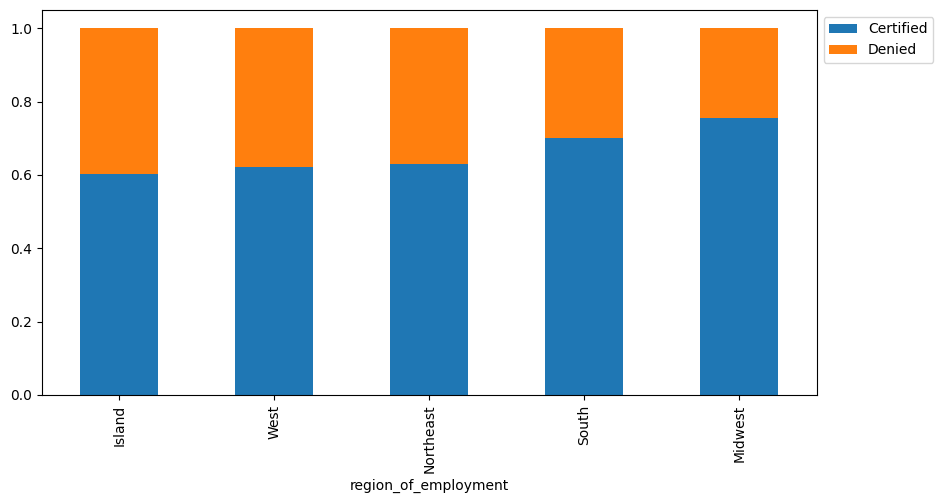

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


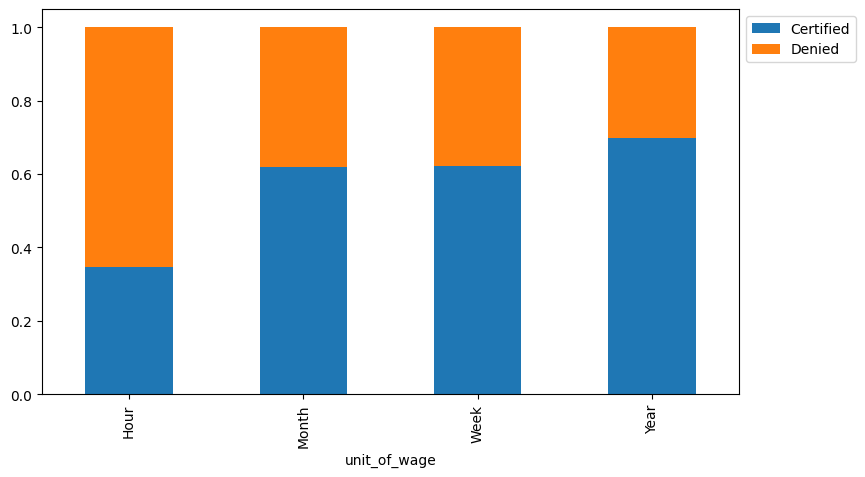

case_status         Certified  Denied    All
full_time_position                          
All                     17018    8462  25480
Y                       15163    7610  22773
N                        1855     852   2707
------------------------------------------------------------------------------------------------------------------------


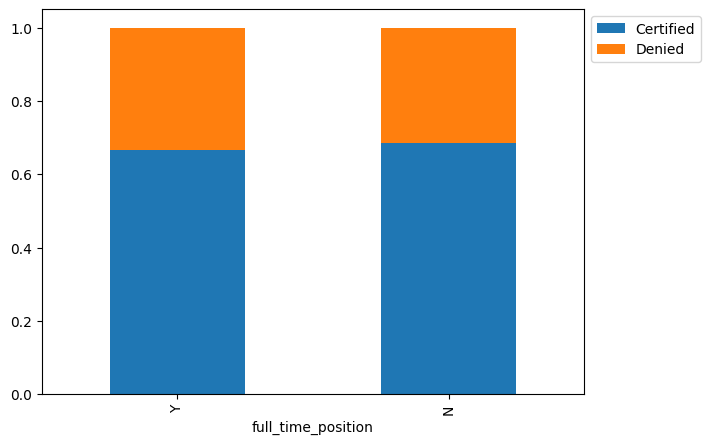

In [25]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

for col in cat_cols:
    stacked_barplot(df_copy, predictor=col, target='case_status')

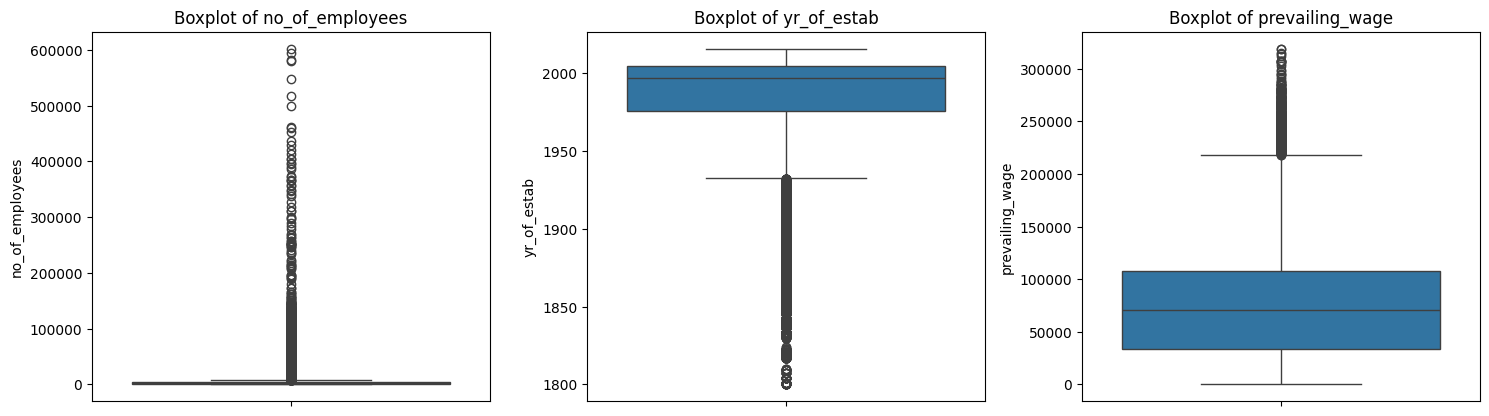

In [26]:
# Task 2.3: Identify and handle outliers in the dataset.

# Plot the boxplots for all numeric columns
plt.figure(figsize=(15, 12))

for i, variable in enumerate(num_cols):
    plt.subplot(3, 3, i + 1)  # Adjust the grid size (rows, columns) as needed
    sns.boxplot(data=df_copy, y=variable)
    plt.title(f'Boxplot of {variable}')
    plt.tight_layout()

plt.show()

In [27]:
for num in num_cols:
    print(f"\n{num} summary")
    print(df_copy[num].describe())


no_of_employees summary
count     25480.000000
mean       5667.089207
std       22877.917453
min          11.000000
25%        1022.000000
50%        2109.000000
75%        3504.000000
max      602069.000000
Name: no_of_employees, dtype: float64

yr_of_estab summary
count    25480.000000
mean      1979.409929
std         42.366929
min       1800.000000
25%       1976.000000
50%       1997.000000
75%       2005.000000
max       2016.000000
Name: yr_of_estab, dtype: float64

prevailing_wage summary
count     25480.000000
mean      74455.814592
std       52815.942327
min           2.136700
25%       34015.480000
50%       70308.210000
75%      107735.512500
max      319210.270000
Name: prevailing_wage, dtype: float64
